In [1]:
from IPython.display import display, Markdown, Latex

import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
if os.path.exists('src'):
    path_dunnetts_table = "src/Dunnetts_Table.csv"

    %load_ext autoreload
    %autoreload 2

    from src.stattests import f_test, dunnetts_q_value, dunnetts_test, _make_dunnetts_q_value
else:
    path_dunnetts_table = "../input/dunnetts-table/Dunnetts_Table.csv"

    !git clone https://github.com/P-Mihail/medstats_ex.git
    from medstats_ex.src.stattests import f_test, dunnetts_q_value, dunnetts_test, _make_dunnetts_q_value # type: ignore

`Dunnetts_Table.csv` provide critical values for various values of alpha for the two-tailed Dunnett’s test.

columns:
* $\nu$ - degrees of freedom (N – m), where N - sum of the observations in all groups, m – number of groups
* $\alpha$ - significance level
* *l* - number of groups including control

# 1. Table view variations

In [3]:
# raw pd.Series from csv file
df = pd.read_csv(path_dunnetts_table, index_col=[0, 1, 2]).squeeze()
display(Markdown("---\n\n### *1. raw pd.Series from csv file:*"))
display(df)
display(Markdown(f"For example: q($\\nu$=5, $\\alpha$=0.05, *l*=6) = `df.loc[5.,0.05,6]` = {df.loc[5.,0.05,6]}"))

# like in statistics books
df = pd.read_csv(path_dunnetts_table, index_col=[0, 1, 2]).unstack(-1).droplevel(0, axis=1)
display(Markdown("---\n\n### *2. like in statistics books*"))
display(df)
display(Markdown(f"For example: q($\\nu$=5, $\\alpha$=0.05, *l*=6) = `df.loc[(5.,0.05), 6]` = {df.loc[(5.,0.05), 6]}"))

# separate tables by alpha
df = pd.read_csv(path_dunnetts_table, index_col=[1, 0, 2]).unstack(-1).droplevel(0, axis=1)
display(Markdown("---\n\n### *3. separate tables by alpha*"))
df_001, df_005, df_01 = (df.loc[a] for a in df.index.unique(0))
display(Markdown("For example $\\alpha$=0.05 `df_005`"))
display(df_005)
display(Markdown(f"For example: q($\\nu$=5, $\\alpha$=0.05, *l*=6) = `df_005.loc[5., 6]` = {df_005.loc[5., 6]}"))

---

### *1. raw pd.Series from csv file:*

v    alpha  l 
2.0  0.01   3     12.40
            4     13.80
            5     14.80
            6     15.60
            7     16.20
                  ...  
inf  0.10   13     2.50
            15     2.55
            17     2.58
            19     2.62
            21     2.64
Name: q_value, Length: 882, dtype: float64

For example: q($\nu$=5, $\alpha$=0.05, *l*=6) = `df.loc[5.,0.05,6]` = 3.62

---

### *2. like in statistics books*

l               3      4      5      6      7      8      9      10     11  \
v     alpha                                                                  
2.0   0.01   12.40  13.80  14.80  15.60  16.20  16.70  17.10  17.50  17.80   
      0.05    5.42   6.06   6.51   6.85   7.12   7.35   7.54   7.71   7.85   
      0.10    3.72   4.18   4.50   4.74   4.93   5.09   5.23   5.34   5.45   
3.0   0.01    6.97   7.64   8.10   8.46   8.74   8.98   9.19   9.37   9.52   
      0.05    3.87   4.26   4.54   4.75   4.92   5.06   5.18   5.28   5.37   
...            ...    ...    ...    ...    ...    ...    ...    ...    ...   
120.0 0.05    2.24   2.38   2.47   2.55   2.60   2.65   2.69   2.73   2.76   
      0.10    1.93   2.08   2.18   2.26   2.32   2.37   2.41   2.45   2.48   
inf   0.01    2.79   2.91   3.00   3.06   3.11   3.15   3.19   3.22   3.25   
      0.05    2.21   2.35   2.44   2.51   2.57   2.61   2.65   2.69   2.72   
      0.10    1.92   2.06   2.16   2.23   2.29   2.34   2.38   2.42   2.45   

l               13     15     17     19     21  
v     alpha                                     
2.0   0.01   18.40  18.80  19.20  19.60  19.90  
      0.05    8.10   8.31   8.49   8.64   8.77  
      0.10    5.62   5.77   5.89   6.00   6.09  
3.0   0.01    9.79  10.00  10.20  10.40  10.50  
      0.05    5.53   5.66   5.77   5.87   5.95  
...            ...    ...    ...    ...    ...  
120.0 0.05    2.81   2.86   2.89   2.93   2.95  
      0.10    2.53   2.58   2.62   2.65   2.68  
inf   0.01    3.29   3.33   3.37   3.40   3.42  
      0.05    2.77   2.81   2.85   2.88   2.91  
      0.10    2.50   2.55   2.58   2.62   2.64  

[63 rows x 14 columns]

For example: q($\nu$=5, $\alpha$=0.05, *l*=6) = `df.loc[(5.,0.05), 6]` = 3.62

---

### *3. separate tables by alpha*

For example $\alpha$=0.05 `df_005`

l,3,4,5,6,7,8,9,10,11,13,15,17,19,21
v,,,,,,,,,,,,,,
2.0,5.42,6.06,6.51,6.85,7.12,7.35,7.54,7.71,7.85,8.10,8.31,8.49,8.64,8.77
3.0,3.87,4.26,4.54,4.75,4.92,5.06,5.18,5.28,5.37,5.53,5.66,5.77,5.87,5.95
4.0,3.31,3.62,3.83,3.99,4.13,4.23,4.33,4.41,4.48,4.60,4.71,4.79,4.87,4.94
5.0,3.03,3.29,3.48,3.62,3.73,3.82,3.90,3.97,4.03,4.14,4.23,4.30,4.37,4.42
6.0,2.86,3.10,3.26,3.39,3.49,3.57,3.64,3.71,3.76,3.86,3.94,4.00,4.06,4.11
7.0,2.75,2.97,3.12,3.24,3.33,3.41,3.48,3.53,3.58,3.67,3.75,3.81,3.86,3.91
8.0,2.67,2.88,3.02,3.13,3.22,3.29,3.35,3.41,3.46,3.54,3.61,3.67,3.72,3.76
9.0,2.61,2.81,2.95,3.05,3.14,3.20,3.26,3.32,3.36,3.44,3.51,3.56,3.61,3.65
10.0,2.57,2.76,2.89,2.99,3.07,3.14,3.19,3.24,3.29,3.36,3.43,3.48,3.53,3.57


For example: q($\nu$=5, $\alpha$=0.05, *l*=6) = `df_005.loc[5., 6]` = 3.62

In [4]:
display(Markdown(f"Domain of the table:\
    \n* $\\nu$: {list(int(x) for x in df.index.unique(1).values[:-1])}\
    \n* $\\alpha$: {df.index.unique(0).values}\
    \n* l: {df.columns.values}"))

Domain of the table:    
* $\nu$: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 16, 18, 20, 24, 30, 40, 60, 120]    
* $\alpha$: [0.01 0.05 0.1 ]    
* l: [ 3  4  5  6  7  8  9 10 11 13 15 17 19 21]

# 2. Interpolation of intermediate values

In [5]:
# Test
assert dunnetts_q_value(5, 0.05, 6) == 3.62

# 3. Usage example

src: https://www.statology.org/dunnetts-test-r/

Suppose a teacher wants to know whether or not two new studying techniques have the potential to increase exam scores for her students. To test this, she randomly splits her class of 30 students into the following three groups:

* Control Group: 10 students
* New Study technique 1: 10 students
* New Study Technique 2: 10 students

After one week of using their assigned study technique, each student takes the same exam.

In [6]:
data = {"control": [76, 77, 77, 81, 82, 82, 83, 84, 85, 89], 
        "new_1": [81, 82, 83, 83, 83, 84, 87, 90, 92, 93],
        "new_2": [77, 78, 79, 88, 89, 90, 91, 95, 95, 98]}

df = pd.concat([pd.Series(v, name=k) for k,v in data.items()], axis=1)
display(df)
agg = df.agg(['count', np.mean, np.std])  # type: ignore
display(agg)

,control,new_1,new_2
0,76,81,77
1,77,82,78
2,77,83,79
3,81,83,88
4,82,83,89
5,82,84,90
6,83,87,91
7,84,90,95
8,85,92,95
9,89,93,98


,control,new_1,new_2
count,10.000000,10.000000,10.000000
mean,81.600000,85.800000,88.000000
std,4.060651,4.391912,7.557189


<AxesSubplot:>

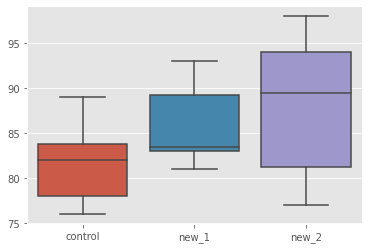

In [7]:
plt.style.use('ggplot')
sns.boxplot(data=df)

\* The first step is to test the hypothesis that there are statistical differences in all groups.

In [8]:
f_test(*agg.values)

Пограничный случай, есть основания задуматься над наличием различий. 0.01 < P = 0.048 < 0.05 (F05 = 3.354 < F = 3.415 < F01 = 5.488)


In [9]:
dunnetts_test(*agg.values, list(df.columns), ctrl_group=0)


Различия статистически не значимы, |q| < q05 = 2.320:
	q('control', 'new_1') = -1.688

Пограничный случай, есть основания задуматься над наличием различий, q01 = 3.010 < |q| < q05 = 2.320:
	q('control', 'new_2') = -2.572

Различия статистически значимы, q01 = 3.010 < |q|:
	--------------------------------------------


* The control group and the first group have no statistical differences.
* The control group and the second group probably have statistical differences.